<img style="float: right;" src="images/Earthwave_logo.png" alt="earthwave" width="90"/> <img style="float: right;" src="images/UZH_logo.jpg" alt="uzh" width="200"/> <img style="float: right;" src="images/ESA_logo.png" alt="esa" width="150"/>

<img src="images/GlaMBIE_logo.png" alt="logo" width="400"/>

#<strong><font color='#11847C'> Gla</font>cier <font color='#11847C'>M</font>ass <font color='#11847C'>B</font>alance <font color='#11847C'>I</font>ntercomparison <font color='#11847C'>E</font>xercise - *A community effort to reconcile measurements of glacier mass balance*</strong>

##This Jupyter Notebook can be used to explore and visualise the final results from the Glacier Mass Balance Intercomparison Exercise (GlaMBIE). In the following code, you can produce plots that demonstrate the global results from the GlaMBIE project. You can also investigate the contributions from individual regions to the global picture.

<div>

## <strong>Getting started</strong>
</div>

First, we import the necessary packages

In [ ]:
# Only run when connected to colab - necessary to use the helpers and plotting modules imported below
!git clone https://github.com/earthwave/glambie_demo_notebooks

In [21]:
import pandas as pd
import glob, os
import colorcet as cc
import seaborn as sns

from helpers import glambie_regions_dropdown, glambie_years_dropdown, derivative_to_cumulative, load_all_region_dataframes
from plotting import global_cumulative_plot, global_comparison_region_plot, global_comparison_stacked_region_plot, histogram_of_region_contributions_to_global_loss_two_years, histogram_of_region_contributions_to_global_loss, histogram_of_region_contributions_to_global_loss_two_years, global_stacked_all_regions_plot
sns.set_theme(palette='Set2', style='whitegrid', font_scale=1.2)
colors_list = sns.color_palette(palette='Set3', n_colors=18, desat=0.9)

In [ ]:
# This line is only needed when sharing the notebooks with GlaMBIE consortium - they will need to drag and drop the unpublished zip file into colab, and then unzip it to access data
!unzip glambie_csvs_to_publish_v3.zip

Each of the results files is downloaded to the current Colab working environment. You can inspect them if you click on the 'Folder' icon on the panel to the left.

<div>

## <strong>Global ice loss</strong>
</div>

First, we will investigate the total loss of ice globally over the GlaMBIE time period (2000 - 2023)

In [2]:
# This line is only necessary when running locally. Once data is available online, it will be downloaded in 
# above cell to the local Colab working directory, so won't need to add local path to the start of 'data_directory' below
local_path = '/data/ox1/working/glambie/demo_notebooks'
#local_path = '/content' #for colab only

In [3]:
temporal_option = 'calendar_years'
data_directory = os.path.join(local_path, 'glambie_csvs_to_publish_v3', temporal_option)

Load the global results dataframe

In [4]:
global_dataframe = pd.read_csv(os.path.join(data_directory, '0_global.csv'))

In [17]:
cumulative_data_all_gt = derivative_to_cumulative(global_dataframe.start_dates, global_dataframe.end_dates, global_dataframe.combined_gt)
cumulative_errors_all_gt = derivative_to_cumulative(global_dataframe.start_dates, global_dataframe.end_dates, global_dataframe.combined_gt_errors, calculate_as_errors=True)

The following plot shows the overall global change in glaciers, across the GlaMBIE study period of 2023 - 2024. The plot shows two metrics on two separate y axes. On the left axis, the annual global rate of change (in m w.e. per year) is shown for each year, with uncertainties indicated. On the right axis, the global cumulative change in Gt is shown (1 Gt = 1,000,000,000,000 kg). 

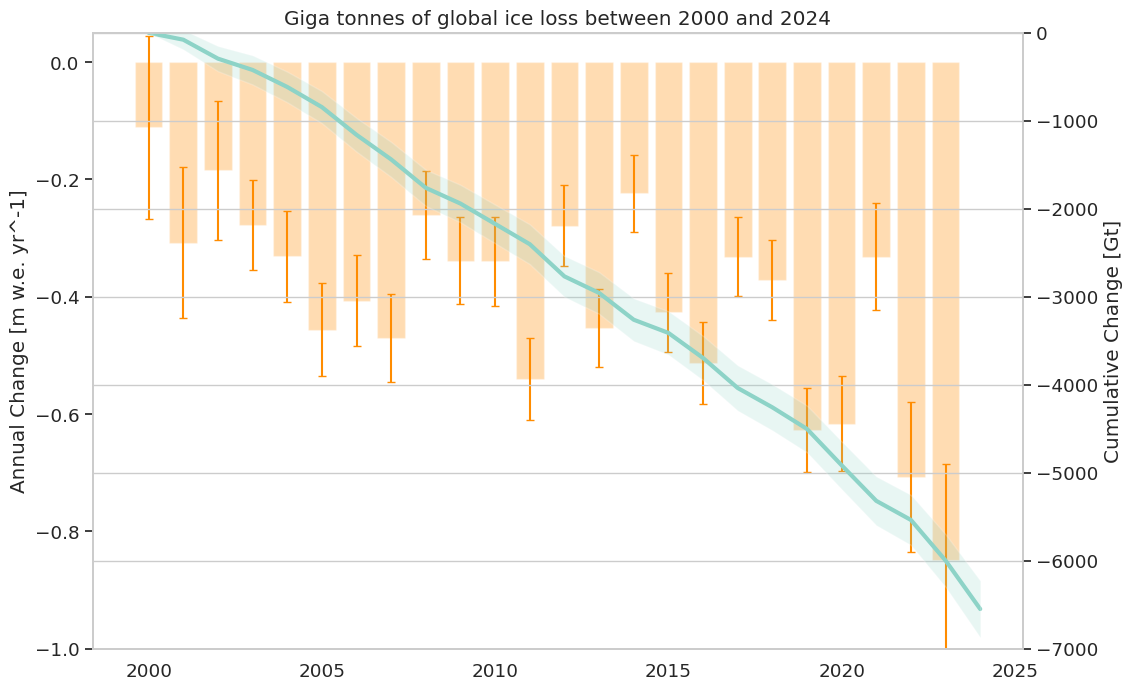

In [18]:
global_cumulative_plot(cumulative_data_all_gt, cumulative_errors_all_gt, global_dataframe, 'Gt')

<div>

## <strong>Contribution of individual regions to global picture</strong>
</div>

Next, you can choose three GlaMBIE regions to see their contributions to the total ice loss across the global. Use each dripdown to pick 3 RGI regions.

In [ ]:
# Add multiple regions to plot to see contributions to global change
first_region = glambie_regions_dropdown()
first_region

In [ ]:
second_region = glambie_regions_dropdown()
second_region

In [ ]:
third_region = glambie_regions_dropdown()
third_region

In [10]:
list_of_csvs = sorted(glob.glob(os.path.join(data_directory, '*.csv')))
for filename in list_of_csvs:
    if first_region.value in filename:
        first_region_dataframe = pd.read_csv(filename)
    if second_region.value in filename:
        second_region_dataframe = pd.read_csv(filename)
    if third_region.value in filename:
        third_region_dataframe = pd.read_csv(filename)

cumulative_data_first_region_gt = derivative_to_cumulative(first_region_dataframe.start_dates, first_region_dataframe.end_dates, first_region_dataframe.combined_gt)
cumulative_errors_first_region_gt = derivative_to_cumulative(first_region_dataframe.start_dates, first_region_dataframe.end_dates, first_region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_second_region_gt = derivative_to_cumulative(second_region_dataframe.start_dates, second_region_dataframe.end_dates, second_region_dataframe.combined_gt)
cumulative_errors_second_region_gt = derivative_to_cumulative(second_region_dataframe.start_dates, second_region_dataframe.end_dates, second_region_dataframe.combined_gt_errors, calculate_as_errors=True)

cumulative_data_third_region_gt = derivative_to_cumulative(third_region_dataframe.start_dates, third_region_dataframe.end_dates, third_region_dataframe.combined_gt)
cumulative_errors_third_region_gt = derivative_to_cumulative(third_region_dataframe.start_dates, third_region_dataframe.end_dates, third_region_dataframe.combined_gt_errors, calculate_as_errors=True)

The following plot again shows the global ice loss between 2000 and 2023. Additionally, it shows the contributions of each of the regions you selected above to this global picture. The cumulative changes for each region are stacked, and the shaded area shows their combined contribution to the global cumulative change.

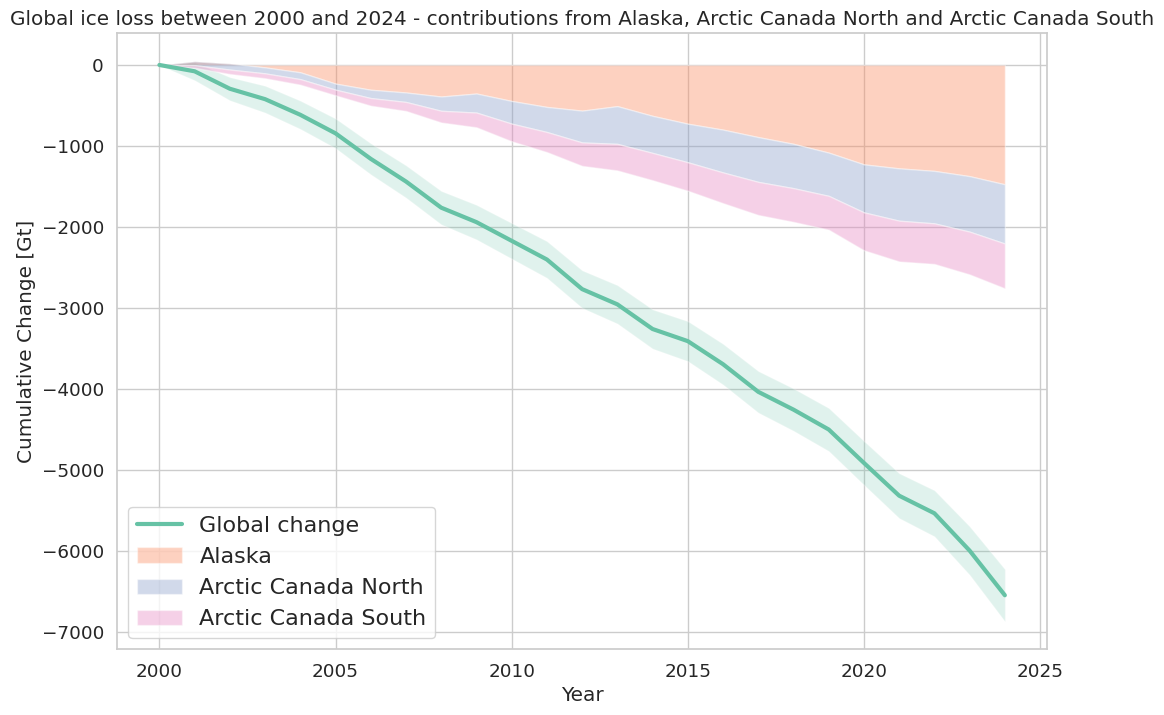

In [22]:
global_comparison_stacked_region_plot(cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_first_region_gt, first_region.value, cumulative_data_second_region_gt, second_region.value, cumulative_data_third_region_gt, third_region.value,)

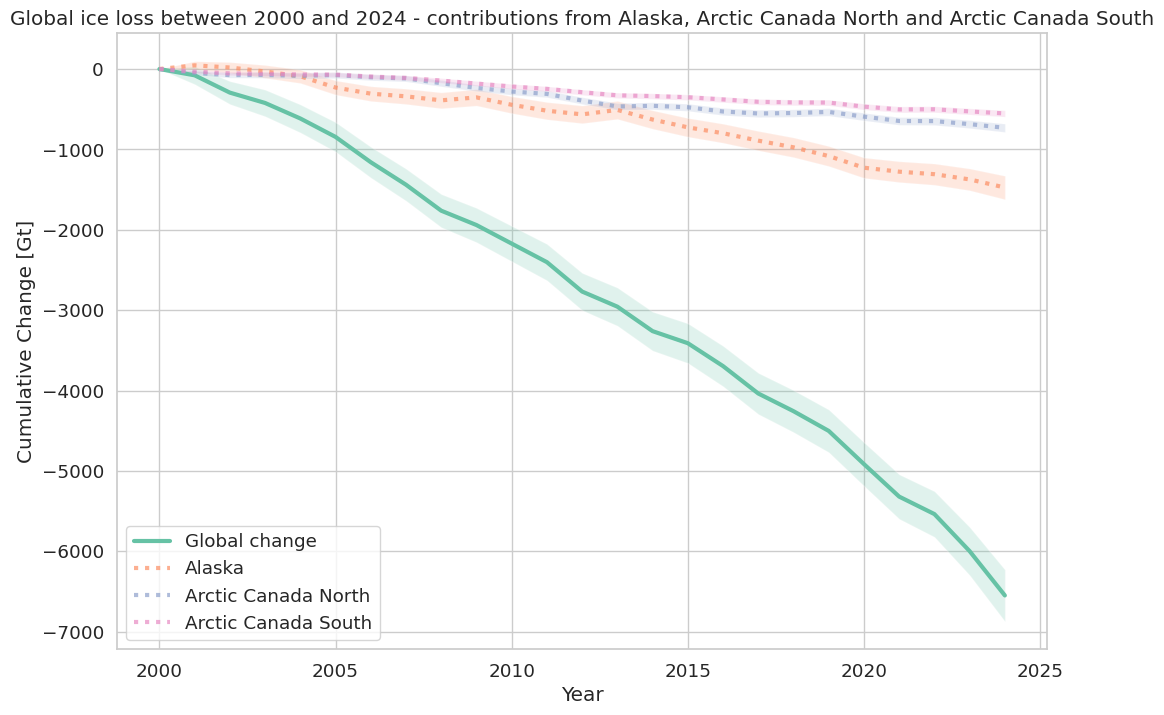

In [23]:
# *Note for consortium - this is an alternative to the plot above, same regional data but not stacked*
global_comparison_region_plot(cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_first_region_gt, cumulative_errors_first_region_gt, first_region.value,
                              cumulative_data_second_region_gt, cumulative_errors_second_region_gt, second_region.value, cumulative_data_third_region_gt, cumulative_errors_third_region_gt, third_region.value, shaded=False)

<div>

## <strong>Contributions of individual regions to the global change in a specific year</strong>
</div>

Finally, choose a single year from the GlaMBIE time coverage, and investigate the contribution from each region to the global change in this year

In [13]:
# Choose a year and see contribtuion from every region to global trend
chosen_year = glambie_years_dropdown()
chosen_year

Dropdown(description='Year: ', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012…

In [14]:
glambie_dataframe_dict = load_all_region_dataframes(data_directory)

The following plot shows the percentage contribtion of each GlaMBIE region to the global change up to your chosen date. 

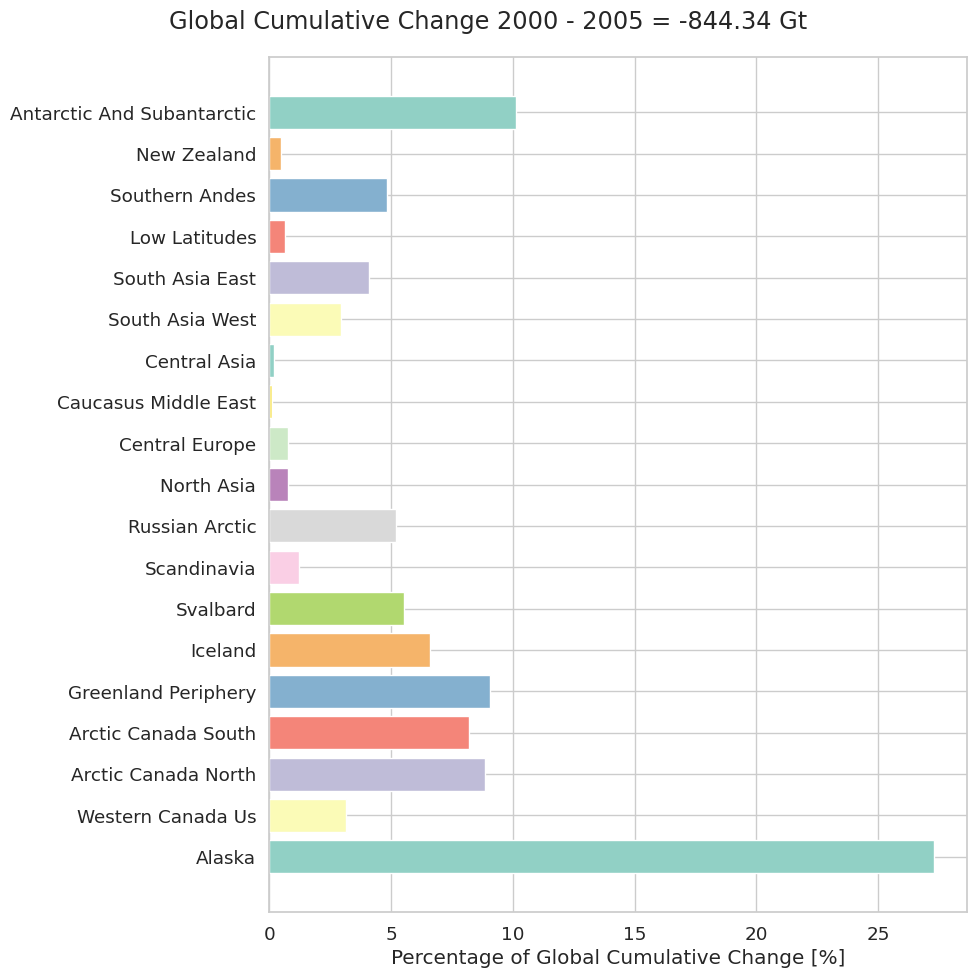

In [24]:
histogram_of_region_contributions_to_global_loss(glambie_dataframe_dict, cumulative_data_all_gt, chosen_year.value, colors_list)

Choose a second year, to see in the final plot the difference in contributions from each region to the global pictures in your chosen years.

In [25]:
comparsion_year = glambie_years_dropdown()
comparsion_year

Dropdown(description='Year: ', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012…

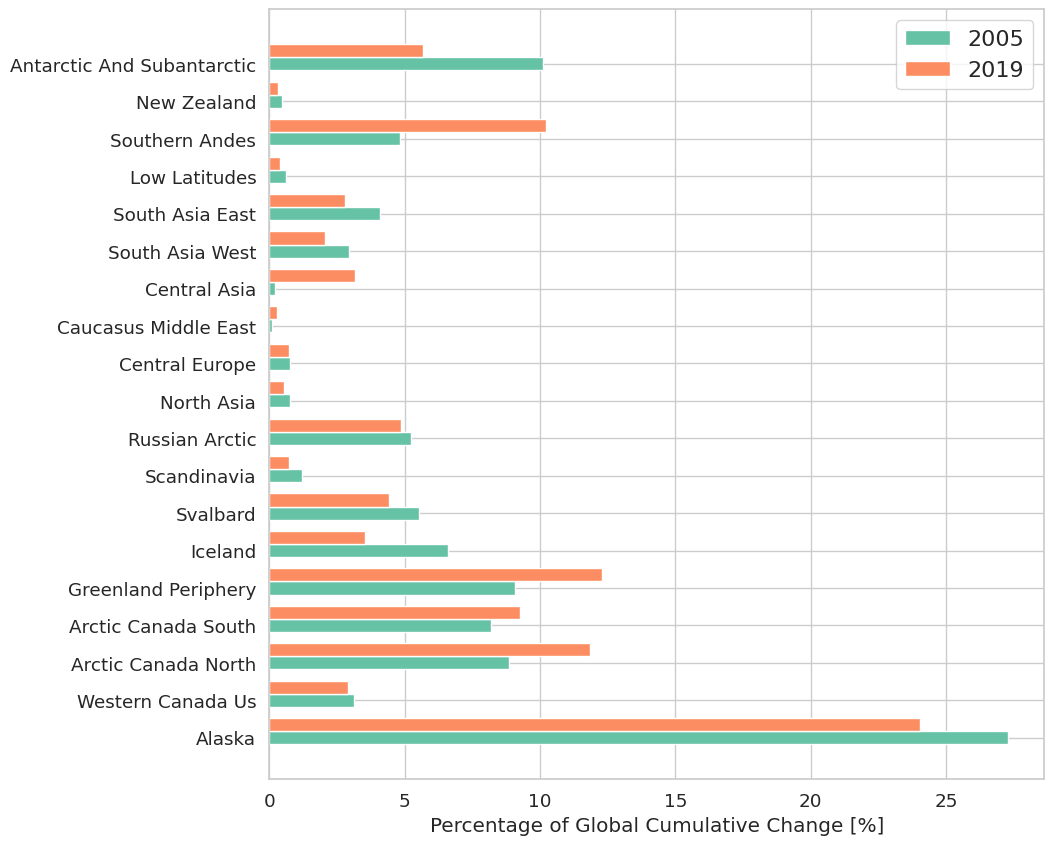

In [26]:
histogram_of_region_contributions_to_global_loss_two_years(glambie_dataframe_dict, cumulative_data_all_gt, chosen_year.value, comparsion_year.value)

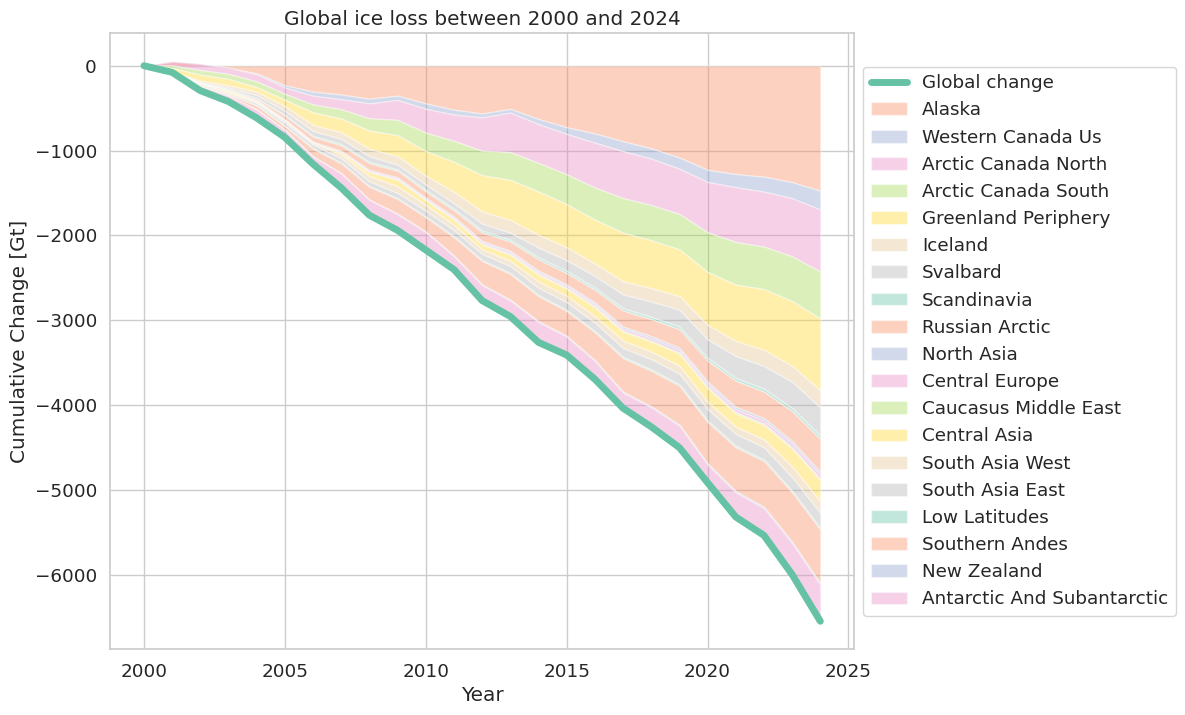

In [27]:
# * Note for consortium - final plot option, all regions stacked compared to global cumulative change, is this useful?
global_stacked_all_regions_plot(cumulative_data_all_gt, glambie_dataframe_dict)